In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

Get the data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
print(f"shape of training data : {train_df.shape}")
print(f"shape of test data : {test_df.shape}")

shape of training data : (891, 12)
shape of test data : (418, 11)


Concat the train and test data set

In [4]:
data = pd.concat([train_df,test_df],axis=0)

Shape of dataset after concatenation

In [5]:
print(f"shape of data : {data.shape}")

shape of data : (1309, 12)


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Check for missing values

In [8]:
data.isnull().sum()/len(data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Remove the irrelevant columns

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data_copy = data

In [13]:
data_copy.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [14]:
data_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


**Univariate Analysis**

% of passengers survived

In [15]:
int(round(data_copy.Survived.mean()*100,0))

38

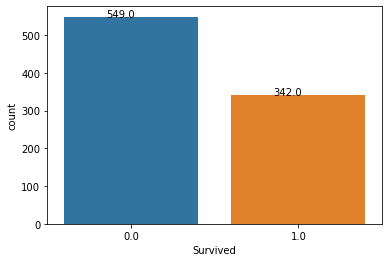

In [16]:
ax = sns.countplot(x="Survived", data=data_copy)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

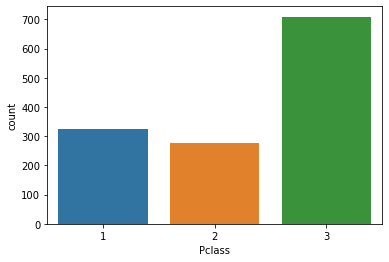

In [17]:
sns.countplot(data_copy['Pclass'])

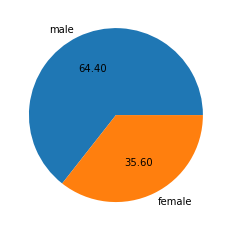

In [18]:
plt.pie(data_copy['Sex'].value_counts().values,autopct='%.2f',labels=['male','female'])
plt.show()

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

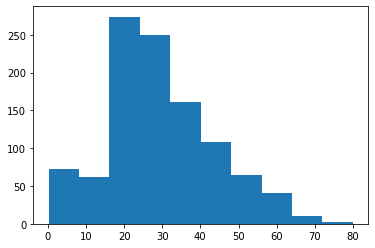

In [19]:
plt.hist(data_copy['Age'])

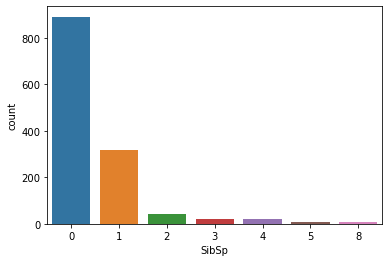

In [20]:
sns.countplot(data_copy['SibSp'])

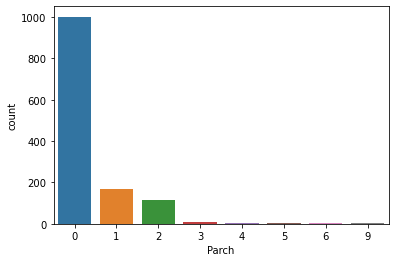

In [21]:
sns.countplot(data_copy['Parch'])

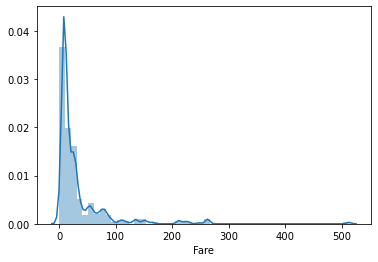

In [22]:
sns.distplot(data_copy['Fare'])

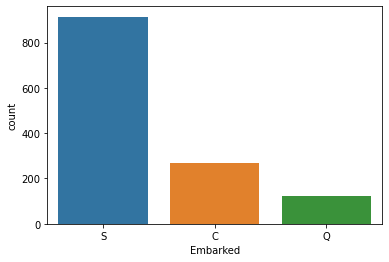

In [23]:
sns.countplot(data_copy['Embarked'])

**Bivariate Analysis**

In [24]:
data_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


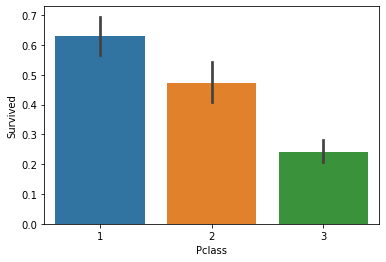

In [25]:
sns.barplot(data_copy['Pclass'],data_copy['Survived'])

In [26]:
data_copy.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

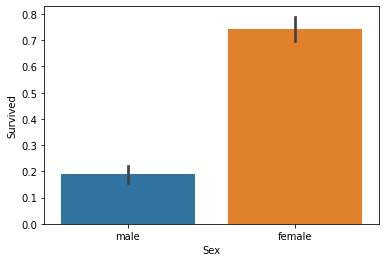

In [27]:
sns.barplot(data_copy['Sex'],data_copy['Survived'])

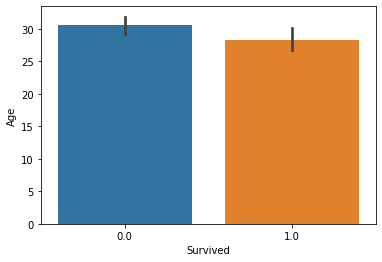

In [28]:
sns.barplot(x=data_copy['Survived'],y=data_copy['Age'])

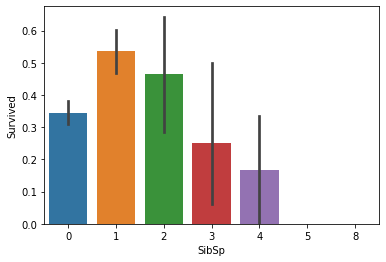

In [29]:
sns.barplot(y=data_copy['Survived'],x=data_copy['SibSp'])

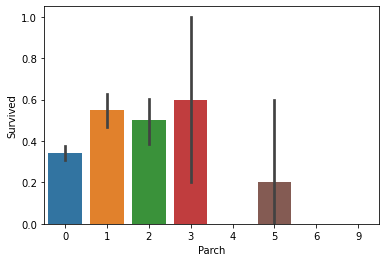

In [30]:
sns.barplot(y=data_copy['Survived'],x=data_copy['Parch'])

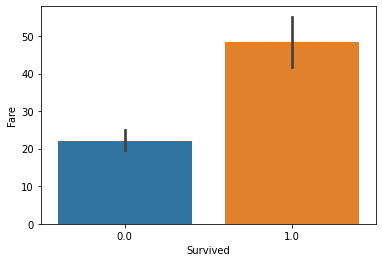

In [31]:
sns.barplot(x=data_copy['Survived'],y=data_copy['Fare'])

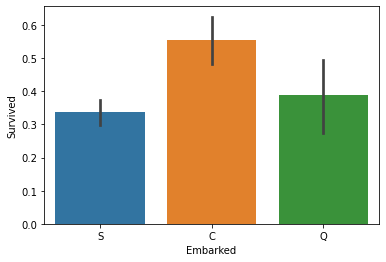

In [32]:
sns.barplot(data_copy['Embarked'],data_copy['Survived'])

In [33]:
data_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


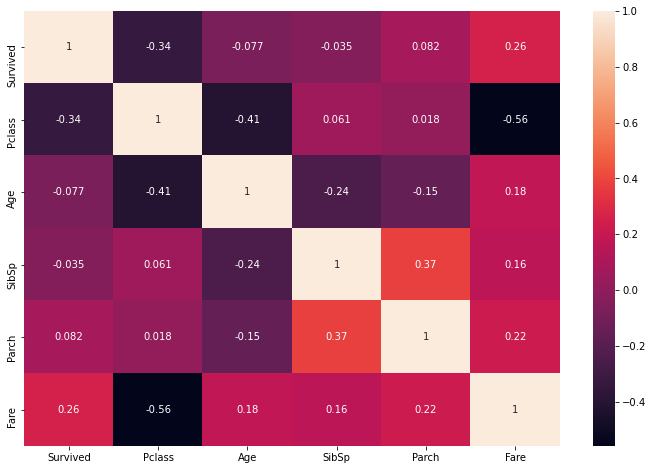

In [34]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(data_copy.corr(), annot=True)
plt.show()

Fill Missing values

In [35]:
data_copy.isnull().sum()/len(data_copy)*100

Survived    31.932773
Pclass       0.000000
Sex          0.000000
Age         20.091673
SibSp        0.000000
Parch        0.000000
Fare         0.076394
Embarked     0.152788
dtype: float64

In [36]:
data_copy['Age'] = data_copy['Age'].fillna(data_copy['Age'].mean())

In [37]:
data_copy['Fare'] = data_copy['Fare'].fillna(data_copy['Fare'].mean())

In [38]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_copy['Embarked'] = imp.fit_transform(data_copy[['Embarked']])

In [39]:
data_copy.isnull().sum()/len(data_copy)*100

Survived    31.932773
Pclass       0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.000000
dtype: float64

In [40]:
pclass_dummy = pd.get_dummies(data_copy['Pclass'],drop_first=True)

In [41]:
sex_dummy = pd.get_dummies(data_copy['Sex'],drop_first=True)

In [42]:
data_copy['SibSp']=data_copy['SibSp'].map({0:'sibsp_0',1:'sibsp_1',2:'other',3:'other',4:'other',5:'other',8:'other'})

In [43]:
sibsp_dummy = pd.get_dummies(data_copy['SibSp'],drop_first=True)

In [44]:
data_copy['Parch']=data_copy['Parch'].map({0:'parch_0',1:'parch_1',2:'parch_2',3:'other',4:'other',5:'other',6:'other',9:'other'})
parch_dummy = pd.get_dummies(data_copy['Parch'],drop_first=True)

In [45]:
embarked_dummy = pd.get_dummies(data_copy['Embarked'],drop_first=True)

In [46]:
dummies=pd.concat([pclass_dummy,sex_dummy,sibsp_dummy,parch_dummy,embarked_dummy],axis=1)

In [47]:
new_data = data_copy[['Survived','Age','Fare']]

In [48]:
final_data = pd.concat([new_data,dummies],axis=1)

In [49]:
final_data.shape

(1309, 13)

In [50]:
final_data.head()

,Survived,Age,Fare,2,3,male,sibsp_0,sibsp_1,parch_0,parch_1,parch_2,Q,S
0,0.0,22.0,7.2500,0,1,1,0,1,1,0,0,0,1
1,1.0,38.0,71.2833,0,0,0,0,1,1,0,0,0,0
2,1.0,26.0,7.9250,0,1,0,1,0,1,0,0,0,1
3,1.0,35.0,53.1000,0,0,0,0,1,1,0,0,0,1
4,0.0,35.0,8.0500,0,1,1,1,0,1,0,0,0,1


In [51]:
final_test_data = final_data[final_data['Survived'].isnull()]

In [52]:
final_test_data.drop(['Survived'],axis=1,inplace=True)

In [53]:
final_test_data.shape

(418, 12)

In [54]:
final_test_data.head()

,Age,Fare,2,3,male,sibsp_0,sibsp_1,parch_0,parch_1,parch_2,Q,S
0,34.5,7.8292,0,1,1,1,0,1,0,0,1,0
1,47.0,7.0000,0,1,0,0,1,1,0,0,0,1
2,62.0,9.6875,1,0,1,1,0,1,0,0,1,0
3,27.0,8.6625,0,1,1,1,0,1,0,0,0,1
4,22.0,12.2875,0,1,0,0,1,0,1,0,0,1


In [55]:
final_train_data = final_data[~final_data['Survived'].isnull()]

In [56]:
final_train_data.head()

,Survived,Age,Fare,2,3,male,sibsp_0,sibsp_1,parch_0,parch_1,parch_2,Q,S
0,0.0,22.0,7.2500,0,1,1,0,1,1,0,0,0,1
1,1.0,38.0,71.2833,0,0,0,0,1,1,0,0,0,0
2,1.0,26.0,7.9250,0,1,0,1,0,1,0,0,0,1
3,1.0,35.0,53.1000,0,0,0,0,1,1,0,0,0,1
4,0.0,35.0,8.0500,0,1,1,1,0,1,0,0,0,1


In [57]:
x = final_train_data.drop(['Survived'],axis=1)
y = final_train_data[['Survived']]

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4681,random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=3000)

In [60]:
y_pred = log_reg.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8014354066985646

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print(scores.mean())

0.8009308510638299


In [63]:
print(y_pred)

[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.

In [64]:
final = pd.DataFrame(pd.read_csv("test.csv").PassengerId)
final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [65]:
final["Survived"] = pd.Series(y_pred)
final

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,1.0
414,1306,0.0
415,1307,1.0
416,1308,1.0


In [66]:
final.to_csv("submission.csv")